In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
data = pd.read_csv("gender.csv", encoding="latin-1")

In [154]:
data.head(
)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [155]:
data.shape

(20050, 26)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

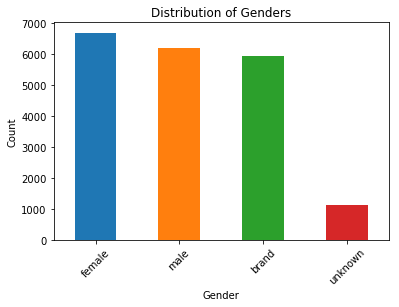

In [157]:
data["gender"].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.title("Distribution of Genders")
plt.xlabel("Gender")
plt.ylabel("Count")

The genders seem balanced. They're seems to be more female tweets than male tweets, but it is close.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

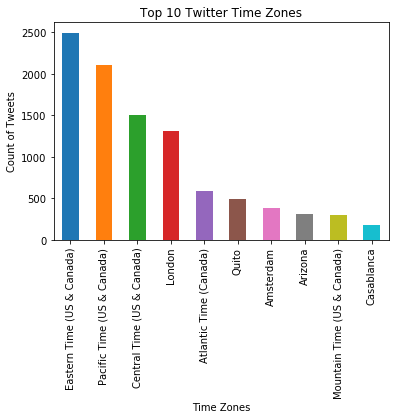

In [158]:
data["user_timezone"].value_counts()[:10].plot.bar()
plt.title("Top 10 Twitter Time Zones")
plt.xlabel("Time Zones")
plt.ylabel("Count of Tweets")
plt.xticks(rotation=90)

The Eastern Time zone in US and Canada is the most popular, followed by the Pacific Time Zone and Central Timezone. All five major US time zones are present within the top 10 most popular time zones. This shows that the US is a major user of Twitter.

In [159]:
import re
def normalize_text(txt):
    txt = str(txt).lower()
    txt = re.sub('\s\W', ' ', txt)
    txt = re.sub('\W\s', ' ',txt)
    
    txt = re.sub('\s+', ' ', txt)

    return txt


In [160]:
data["gender:confidence"].mean()

0.8827556232520969

In [161]:
data["text"].apply(normalize_text)

0        robbie e responds to critics after win against...
1        ûïit felt like they were my friends and i was...
2        i absolutely adore when louis starts the songs...
3        hi jordanspieth looking at the url do you use ...
4        watching neighbours on sky catching up with th...
5        ive seen people on the train with lamps chairs...
6        @bpackengineer thank you for your patience whi...
7        gala bingo clubs bought for å£241m the uk's la...
8        @_aphmau_ the pic defines all mcd fangirls/fan...
9        @evielady just how lovely is the tree this yea...
10       how are you taking care of yourself https://t....
11       mtg deals 1x rank-up-magic the seventh one pri...
12       just put my ass on the line for you and this i...
13       https://t.co/z4sbwuugd8 what the nation will b...
14       will i even need sound effects for the diviner...
15       https://t.co/erogwtftyo it's a glow of satisfa...
16       @giannaaa28 lmao _ù÷â_ù÷â dude i'm hella scare.

In [24]:
from wordcloud import WordCloud, STOPWORDS


In [25]:
words = data["text"].value_counts().keys()
wc = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black", stopwords=STOPWORDS).generate(" ".join(words))

(-0.5, 1999.5, 999.5, -0.5)

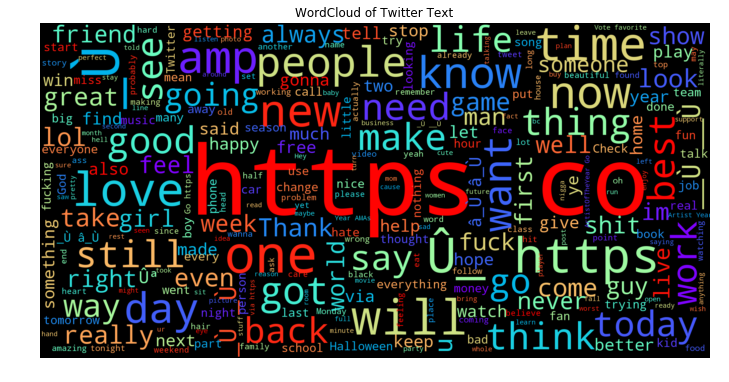

In [27]:
plt.figure(figsize=(12,14))
plt.title("WordCloud of Twitter Text")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [29]:
avg_tweets_timezone = data.groupby(["user_timezone"])["tweet_count"].mean().reset_index().sort_values(by="tweet_count", ascending=False)

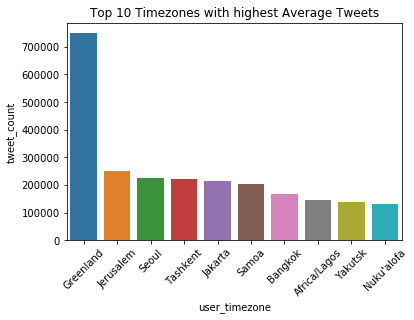

In [31]:
ax = sns.barplot(x="user_timezone", y = "tweet_count", data=avg_tweets_timezone[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Timezones with highest Average Tweets")

Greenland has the highest average number of tweets per user. None of the top timezones are from the United States even though the most popular time zones are in the United States. 

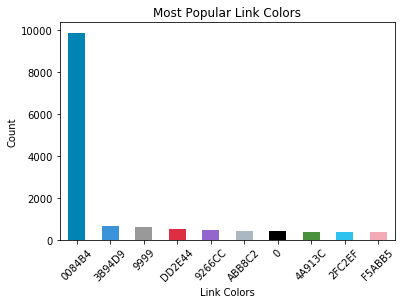

In [57]:
my_colors = list(islice(cycle(["#0084B4", "#3B94D9", "#999999", "#DD2E44", "#9266CC", "#ABB8C2", "0", "#4A913C", "#2FC2EF", "#F5ABB5"]), None, len(data)))

ax = data["link_color"].value_counts()[:10].plot.bar(color=my_colors)
plt.xticks(rotation=45)
plt.xlabel("Link Colors")
plt.ylabel("Count")
plt.title("Most Popular Link Colors")


In [33]:
d = data["description"].value_counts().keys()
wc = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black", stopwords=STOPWORDS).generate(" ".join(d))

(-0.5, 1999.5, 999.5, -0.5)

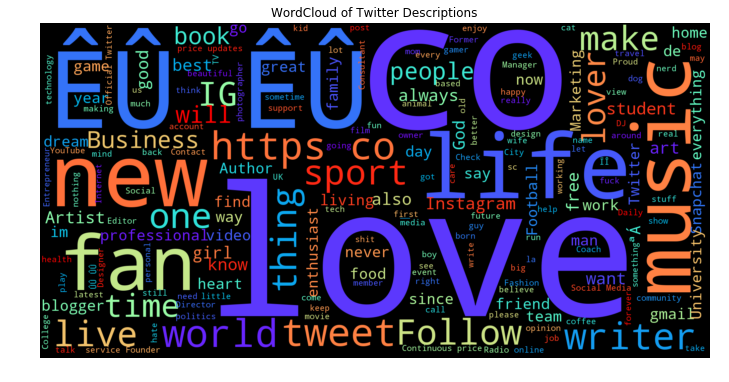

In [34]:
plt.figure(figsize=(12,14))
plt.title("WordCloud of Twitter Descriptions")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  """


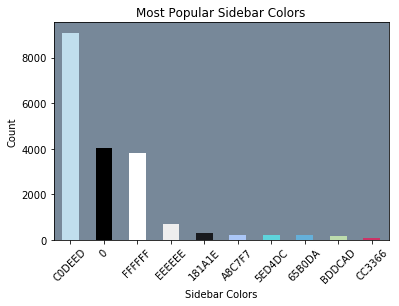

In [54]:
from itertools import cycle, islice
my_colors = list(islice(cycle(["#C0DEED", "0", "#FFFFFF", "#EEEEEE", "#181A1E", "#ABC7F7", "#5ED4DC", "#65B0DA", "#BDDCAD", "#CC3366"]), None, len(data)))

ax = data["sidebar_color"].value_counts()[:10].plot.bar(color=my_colors)
ax.set_axis_bgcolor("lightslategray")

plt.xticks(rotation=45)
plt.xlabel("Sidebar Colors")
plt.ylabel("Count")
plt.title("Most Popular Sidebar Colors")

In [36]:
avg_favorite_tweets_timezone = data.groupby(["user_timezone"])["fav_number"].mean().reset_index().sort_values(by="fav_number", ascending=False)

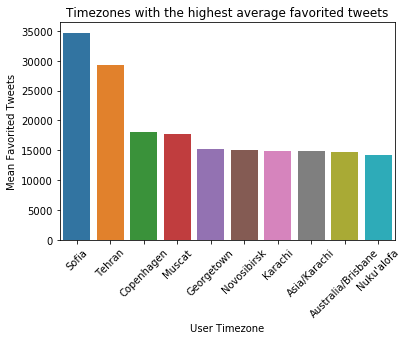

In [38]:
ax = sns.barplot(x="user_timezone", y = "fav_number", data=avg_favorite_tweets_timezone[:10])
plt.xticks(rotation=45)
plt.title("Timezones with the highest average favorited tweets")
plt.xlabel("User Timezone")
plt.ylabel("Mean Favorited Tweets")

The timezones with the highest average favorited tweets are all from different countries. None of them are from the United States.

In [62]:
data["_golden"].value_counts()

False    20000
True        50
Name: _golden, dtype: int64

In [76]:
used_data = data[data["gender:confidence"] == 1]
used_data = used_data.drop(["profile_yn", "_unit_id", "tweet_coord", "retweet_count"], axis=1)
used_data

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,fav_number,...,name,profile_yn_gold,profileimage,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,False,finalized,3,10/26/15 23:24,male,1.0,1.0,12/5/13 1:48,i sing my own rhythm.,0,...,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,False,finalized,3,10/26/15 23:30,male,1.0,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,...,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
3,False,finalized,3,10/26/15 23:10,male,1.0,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,...,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,False,finalized,3,10/27/15 1:15,female,1.0,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,...,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,False,finalized,3,10/27/15 1:47,female,1.0,1.0,3/11/10 18:14,you don't know me.,3901,...,monroevicious,NaN,https://pbs.twimg.com/profile_images/656336865...,0,"Ive seen people on the train with lamps, chair...",20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,False,finalized,3,10/27/15 1:57,brand,1.0,1.0,4/24/08 13:03,"A global marketplace for images, videos and mu...",4122,...,Shutterstock,NaN,https://pbs.twimg.com/profile_images/528547133...,0,@BpackEngineer Thank you for your patience whi...,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,False,finalized,3,10/26/15 23:48,male,1.0,1.0,12/3/12 21:54,The secret of getting ahead is getting started.,80,...,RobinMeske,NaN,https://pbs.twimg.com/profile_images/508875440...,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,False,finalized,3,10/27/15 1:52,female,1.0,1.0,9/8/15 4:50,Pll Fan // Crazy about MCD // Ramen is bae,1825,...,pigzilla_,NaN,https://pbs.twimg.com/profile_images/658670112...,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,False,finalized,3,10/27/15 1:49,female,1.0,1.0,5/13/11 3:32,"Renaissance art historian, University of Notti...",3115,...,GabrieleNeher,NaN,https://pbs.twimg.com/profile_images/513327289...,FFFFFF,@Evielady just how lovely is the tree this yea...,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam
11,False,finalized,3,10/26/15 22:33,brand,1.0,1.0,2/22/15 20:06,highly extraordinary auctions,0,...,eliseotecleo,NaN,https://pbs.twimg.com/profile_images/569710046...,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...,66684,10/26/15 12:40,6.587300e+17,NaN,Pacific Time (US & Canada)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn import preprocessing

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,fav_number,...,name,profile_yn_gold,profileimage,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone


In [129]:
def feature_selection(df):
    #df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["created", "gender", "gender:confidence", "profile_yn:confidence", "_golden", "_unit_state", "tweet_created", "link_color", "sidebar_color"], axis=1)
    all_y = df["gender"]
    rfc = RandomForestClassifier(random_state=1)
    select = RFECV(rfc, cv=10)
    select.fit(all_X, all_y)
    best_columns = list(all_X.columns[select.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    return best_columns

In [130]:
train, test = train_test_split(used_data, test_size=0.3, random_state=0)

In [131]:
train.isnull().sum()

train = train.drop(["_last_judgment_at", "description", "gender_gold", "profile_yn_gold", "tweet_location", "user_timezone"], axis=1)

In [132]:
le = preprocessing.LabelEncoder()
labels = ["name", "profileimage", "sidebar_color", "text"]
for i in labels:
    train[i] = le.fit_transform(train[i])
    print(i)


name
profileimage
sidebar_color
text


In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9748 entries, 18800 to 3817
Data columns (total 16 columns):
_golden                  9748 non-null bool
_unit_state              9748 non-null object
_trusted_judgments       9748 non-null int64
gender                   9748 non-null object
gender:confidence        9748 non-null float64
profile_yn:confidence    9748 non-null float64
created                  9748 non-null object
fav_number               9748 non-null int64
link_color               9748 non-null object
name                     9748 non-null int64
profileimage             9748 non-null int64
sidebar_color            9748 non-null int64
text                     9748 non-null int64
tweet_count              9748 non-null int64
tweet_created            9748 non-null object
tweet_id                 9748 non-null float64
dtypes: bool(1), float64(3), int64(7), object(5)
memory usage: 1.2+ MB


In [134]:

cols = feature_selection(train)

Best Columns 
------------
['fav_number', 'name', 'profileimage', 'text', 'tweet_count']



In [137]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
X_train = train[["fav_number", "name", "profileimage", "text", "tweet_count"]]
y_train = train["gender"]
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [138]:
le = preprocessing.LabelEncoder()
labels = ["name", "profileimage", "sidebar_color", "text"]
for i in labels:
    test[i] = le.fit_transform(test[i])
    print(i)

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


name
profileimage
sidebar_color
text


In [139]:
X_test = test[["fav_number", "name", "profileimage", "text", "tweet_count"]]
y_test = test["gender"]

predictions = rf.predict(X_test)


In [141]:
scores = cross_val_score(rf, X_test, y_test)

In [142]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.01)


In [143]:
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer

In [179]:
data["norm_text"] = data["text"].apply(normalize_text)
data["norm_description"] = data["description"].apply(normalize_text)
data = data[data["gender:confidence"] == 1]

In [180]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data["norm_text"])

le = preprocessing.LabelEncoder()
y = le.fit_transform(data["gender"])



In [181]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [182]:
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [183]:
nb.score(X_test, y_test)

0.57994255624700819

In [184]:
data["all_text"] = data["norm_text"].str.cat(data["norm_description"], sep=" ")

In [185]:
data = data[data["gender:confidence"] == 1]

In [186]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data["norm_text"])

le = preprocessing.LabelEncoder()
y = le.fit_transform(data["gender"])

In [187]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [188]:
nb.score(X_test, y_test)

0.57994255624700819